# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: ** 
+ **As `'RM'` increases, `'MEDV'` increases**. Having additional bedrooms and/or bonus rooms and/or entertainment rooms will not only make the home larger, but it will also make the home more desireable to a potential buyer. Accordingly, this will increase a home's value.
+ **As `'LSTAT'` increases, `'MEDV'` decreases**. In the world of housing markets, there is an assumption of correlation between the proportion of "lower class" people in a neighborhood and undesirable aspects of life, e.g., higher crime rates, fewer employment options, lower quality shopping/dining options, etc. Data for a specific housing market (if available) may or may not support such a correlation, but the assumption is prevalent nevertheless. Hence, increasing a neighborhood's proportion of "lower class" families will decrease property values. 
+ **As `'PTRATIO'` increases, `'MEDV'` decreases**. When the student to teacher ratio increases, this means that the schools in the neighborhood are getting more crowded. Typically, the best schools will have fewer students per teacher than lower quality schools. Higher quality neighborhoods are more likely to have better/newer schools with less crowding, better qualified teachers, and higher graduation rates. Therefore, as the student to teacher ratio increases in a neighborhood, we expect it to be a lower quality neighborhood with lower home values.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** Yes, I would consider this model to have successfully captured the variation in the target variable. The metric shows that 92.3% of the variation in the target variable is predictable by the model.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1984)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: ** The idea behind splitting the data into training and testing subsets is that after training a model, one should test the predictive capability of that model on data that was not used to train the model. Applying a testing metric will allow one to assess the efficacy of the model used on that specific collection of data. Finding a good proportional split will depend on several things, e.g., the amount of data that you have, the computational capability of your computing resources, and others. If the training data proportion is very small (*close to zero*), underfitting is likely to occur. In this situation, not enough data was used to train the model. Hence, the model will not do a good job in determining the actual relationship between the features and the prediction variable. If the training data proportion is very large (*close to one*), overfitting is likely to become an issue with your model, and it is possible that this overfitting mistake would be difficult to detect with so little testing data. If your model is learning the noise in the data, then a sufficient amount of testing data should reveal this mistake. In other words, without sufficient testing data one cannot determine if the model has simply memorized the data or learned the relationship between the features and dependent variable.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

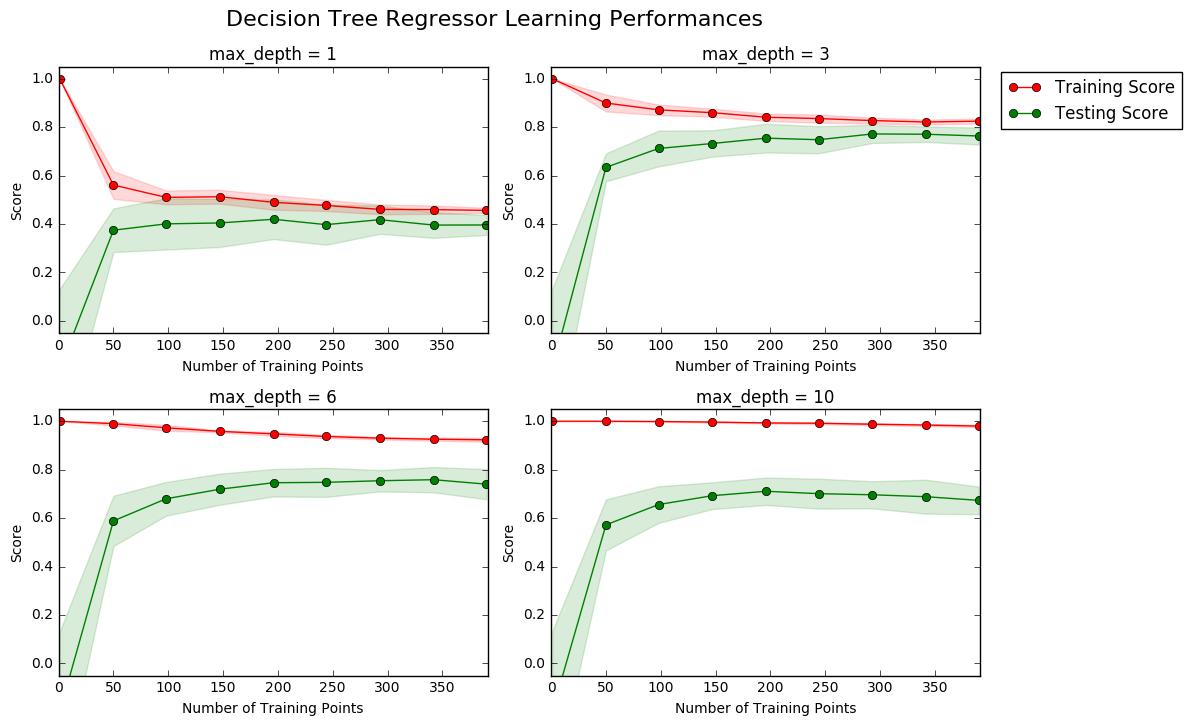

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: ** I am choosing the graph with `max_depth = 3`. The scores of the two curves appear to be converging to scores near 0.8, with the training curve scores just above 0.8 and the testing curve scores just below 0.8. It appears that using this particular model with this data set would **not** benefit from more training points. More training points would be unnecessary since adding additional ones would provide only marginal improvement in the testing data score. Additionally, increasing the number of training data points would require more time for computation of the model parameters. This would only be desirable if adding the additional data resulted in a model with noticebly better evaluation performance.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

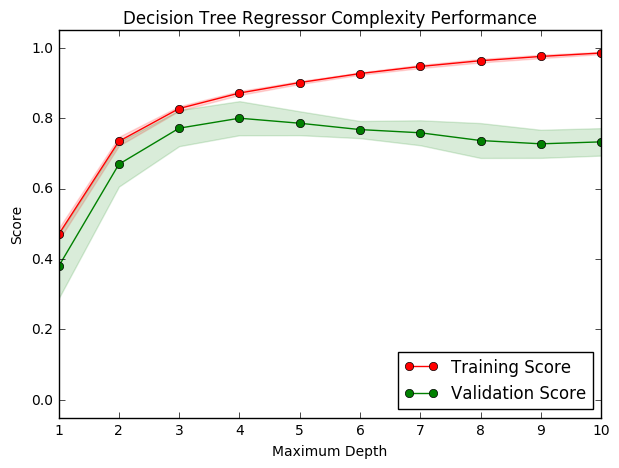

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: ** When the model is trained with `maximum_depth = 1`, the model suffers from high bias. The primary visual evidence of this is the low value of the training score (*just under 0.5*). Also we notice that both curves begin increasing as the maximum depth gets bigger than 1. This means that the model is improving as we move to the right along the `maximum_depth` axis. It is important to note here that the training score curve is an increasing function, so it continues to increase all the way to `maximum_depth = 10`; however, the validation score curve has a maximum between 1 and 10 (*appears to be at 4*) and then begins to decrease.

When the model is trained with `maximum_depth = 10`, the model suffers from high variance. The visual evidence for this lies in the separation between the two curves at this maximum depth. The training score is nearly 1, i.e., the error is almost zero. However the testing score is quite a bit lower (*less than 0.75*). It is obvious that the two curves have diverged and do not converge to the same $R^2$ score. This suggests that that the model does not generalize well at this value of `maximum_depth`.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: ** My intuition tells me that the model that best generalizes to unseen data will probably be the one where the the validation score curve achieves its maximum. This happens when `maximum_depth = 4`. As the model complexity increases beyond this point, we notice that the validation scores decrease. This curve shows that as `maximum_depth` is increased beyond four, the effects of high variance begin to be revealed as the model is overfitting the data. 

*Side Note*: I imagine there are some caveats to simply choosing the value of `maximum_depth` where the validation score is maximized, though. One could envision a validation score curve that increases steeply (large first derivative) to a point when `maximum_depth = 3` (for example) and then nearly "flattens out" but continues to increase at a shallow angle (positive first derivative close to zero) and achieving a maximum at `maximum_depth = 9`. If the the validation score increased by only a very small amount between these two values, it might be prudent to choose the less complex model. If your data set is very large, choosing `maximum_depth = 9` over `maximum_depth = 3` simply because the validation curve achieved its maximum there might give you slightly better performance at the cost of more time and computation resources necessary to fit the model. Of course, in practice this aspect might not be discovered during parameter tuning, e.g. a grid search, unless a user-defined scoring function is used that contains logic to capture this structure of the training data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: ** The grid search technique is an exhaustive search method used to tune (optimize) selected parameters of a user's chosen learning estimator. Essentially, one passes the grid search object an estimator and a grid of parameters. This grid of parameters is either a dictionary or a list of dictionaries. The method will then perform a **fit** and **score** for each permutation of selected parameters across all possibilites from the input dictionary (or dictionaries). This allows one to more easily optimize selected parameters for a given estimator. As an example, consider the code snippet below.

`grid = {'C': [1, 10, 100], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}`

In this parameter grid, the exhaustive search would occur over all permutations that use the kernel `rbf` with the cross-product of the two lists `[1, 10, 100]` and `[0.01, 0.001]` for the parameters `'C'` and `'gamma'`, respectively. The permutation of parameters having the best score may then be used for the training data fit.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: ** The $k$-fold cross-validation training technique is a method used to evaluate the hyperparameters, e.g. `'gamma'` in Support Vector Classification, of a training estimator. If one simply split the data into train/test subsets and tuned the hyperparameters until performance on the test data was optimized, then it is possible to overfit the test data because such a process would allow information about the structure of the test data to flow back into the model design. To prevent this the training data itself is further sub-divided into a validation set which is used for this hyperparameter tuning process. To deal with the prospect of limited data now available due to multiple splits, one method is this so-called "$k$-fold cross-validation" technique. The training data will be split into $k$ folds and a performance metric will be computed $k$ times, each time using a different fold as an evaluation set. In each of the iterations, ($k-1$) of the folds are used as the training data set with the remaining fold used for evaluation. The performance metric returned by this process is the mean of the $k$ performance metrics computed during each iteration. 

This cross-validation technique complements the grid search method described above. The primary benefit is the same as the one mentioned above that motivated the use of a validation subset of the training set in the first place. While tuning parameters using grid search, a performance metric or *score* is computed for each permutation of the estimator parameters. If we only use a fixed subset of the training data for validation while optimizing a collection of chosen hyperparameters, then the process itself is prone to overfit this fixed validation data set. In other words, with sufficient patience from the coder it would be possible to determine the hyperparameters that simply "memorized" the dependent variable value for each of the tuples of independent variables from the validation data. But this is not desired. We want the validation process to find the permutation of hyperparameters that performs best on the training data "overall." Hence, the grid search process is best when it incorporates a $k$-fold cross-validation process as part of its performance metric computation. Together, grid search and $k$-fold cross-validation will determine the best permutation of hyperparameters for the training data set as a whole among the possible hyperparameter permutaions possible from the parameter grid.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn version 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.20, random_state=0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** The optimal model has a maximum depth of four, which is the same as my guess in **Question 6**.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,152.94
Predicted selling price for Client 2's home: $229,180.00
Predicted selling price for Client 3's home: $892,850.00


**Answer: ** The recommended original list price (OLP) will depend on several things. Below I detail my considerations prior to offering each client a recommendation. 

First, every housing market varies with respect to which side (buyer or seller) the strength is skewed towards, and this information would be known to any real estate agent in Boston or any other city. For example, the mean of a market's selling-price-to-OLP ratios might be $R_{\mu}=0.9$, i.e., "on average" homes in that market sell for 90% of their OLP. For a market that is very good for buyers, this ratio might be quite low, under 0.7 perhaps. In a very strong seller's market, competitive bidding can force some selling prices to exceed their OLP which might produce a ratio that is larger than 1. 

Second, the expected sell price is not the only consideration; time to sell is an important consideration. Even within a market where it is known that $R_{\mu}=0.9$, this might only be a reasonable guideline to an agent if the client is comfortable with the home being on the market 3 to 9 months (or some other interval of time well-known to that market's agents). Most people probably fit into this group, but some people need to sell quickly and some can wait indefinitely. If a client fit one of these descriptions, I would modify my recommendation accordingly.

For the purpose of this exercise I will assume that $R_{\mu}=0.9$ for this market. Hence, I will suggest an OLP for the clients so that the predicted selling prices are approximately 90% of the respective OLP.

- Client 1: With an expected selling price of \$407,152.94, I would suggest an OLP of \$450,000.
- Client 2: With an expected selling price of \$229,180.00, I would suggest an OLP of \$255,000.
- Client 3: With an expected selling price of \$892,850.00, I would suggest an OLP of \$990,000.

These prices do seem reasonable based on their features and the information from our initial data exploration. The minimum selling price was around \$100,000, and the maximum selling price was just over \$1,000,000. The mean selling price was around \$450,000, and the median selling price was around \$440,000. The standard deviation of selling prices was about \$165,000.

+ Based on the features in the chart, it does seem that Client 1 has "nearly average" features. It is likely a two bedroom home; I would think the average home likely has two or three bedrooms. The schools in this client's neighborhood have a good student to teacher ratio, but I think the neighborhood poverty level is a little elevated. This seems to be a reasonable indicator that the predicted selling price is a little bit below the mean and median of the origianl data set. 
+ Client 2 seems to have a house that is just a little "less nice" (based on the lone house-structure feature), but it's located in a noticeably lower quality location based on the very high poverty rate and the much higher student to teacher ratio. I think it is reasonable that this home should sell for at least a standard deviation less than Client 1's home. 
+ Client 3 clearly has the best collection of features among these three, and will easily sell for the highest of the three. The predicted selling price for this home is more than 2.5 standard deviations above the mean selling price from the data set and about 80% of a standard deviation below the maximum selling price in the data set. This makes sense. We can reasonably expect that there may be larger homes, in neighborhoods with perhpas zero poverty, and having student-to-teacher ratios at 10 to 1 or better. However, we wouldn't expect too many homes of this quality. Over the entire data set, it's reasonable to expect such nice features as those of Client 3 to be quite rare, which is indicative of an expected selling price being 2.5 standard deviations above the mean of the given data.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00
Trial 11: $406,933.33
Trial 12: $407,480.77
Trial 13: $410,146.15
Trial 14: $327,450.00
Trial 15: $408,240.00
Trial 16: $416,550.00
Trial 17: $413,917.24
Trial 18: $412,950.00
Trial 19: $423,913.64
Trial 20: $397,740.00
Trial 21: $306,337.50
Trial 22: $407,400.00
Trial 23: $409,100.00
Trial 24: $411,133.33
Trial 25: $412,324.14
Trial 26: $422,100.00
Trial 27: $403,375.00
Trial 28: $417,320.69
Trial 29: $316,718.18
Trial 30: $415,400.00

Range in prices: $117,576.14
Standard Deviation of prices: $30,613.04


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: ** I do not think this model should be used in a real-world setting. Obviously the raw data from 1978 itself would be irrelevant today. I know that the data was adjusted multiplicatively to account for inflation, but this also seems precarious. There are factors that can affect a housing market that are not captured accurately by national estimates of economic inflation. For example, a major company (e.g., Amazon, GE, etc.) might build a facility in the suburbs of City A. Within a couple of years, the surrounding area will probably have grown tremendously and the housing costs near this facility would likely spike, exceeding inflation. The opposite could also happen; a natural disaster could cause widespread destruction in a coastal region. Within a few months, the housing market there would drop significantly, against inflation. Housing market recovery might take a decade or more. The point is this: a simple inflation modification to price data might be okay in some areas or for the nation as a whole (maybe not), but in general this would be a poor assumption to make given nearly 40 years have passed. Data collected in an urban city would not be applicable to a rural city. A home in Boston, MA with identical features to one in Cody, WY might cost four times as much or more.

I don't think the features above are sufficient. I can think of many other features that one might consider in lieu of or in addition to total number of rooms. Some examples are: square footage of the house, acreage of the plot, and value of recent upgrades (e.g., appliances, roof, windows, air conditioning, pool, plumbing). It is definitely fair to judge the price of a home based on neighborhood characteristics. For some people these features are more important than the ones describing the house itself. The two used in the model above are certainly important, but so are others. For example a few other features that might be of use are: rate of violent and/or non-violent crime for the neighborhoood, proximity to shopping and/or dining options, and proximity to points of interest (e.g., community boat launch, beach, amusement park). 

I do not think this model is robust enough to make either accurate or consistent predictions for 2017 Boston. I think the model will suffer from accuracy due to the limited features selected to train the model. I think the model suffers from consistency based on the output of the `vs.PredictTrials()` function above. I modified it to run the `fit_model` function 30 times and to also output the standard deviation. As you can see above, the range in prices for a single home is \$117,576.14 with a standard deviation of \$30,613.04. I believe this variation is too high. My recommendation would be to train a model using more (and more relevant) features and to only use data that is at most five years old.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.